In [1]:
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings('ignore')

In [2]:
#carregando o arquivo principal

dbLocation = ("C:/Users/Deusdedith Junior/Desktop/Bases/Acessos_Telefonia_Movel_202201-202206.csv") 

In [3]:
dfAcesso = pd.read_csv(dbLocation,
                      sep =";",
                      encoding="utf-8")

In [4]:
dfAcesso.sort_values(by = 'Mês',
                     ascending = True).head(3)

Ano  Mês Grupo Econômico Empresa           CNPJ Porte da Prestadora  \
2066131  2022    1  TELECOM ITALIA     TIM  2421421000111        Grande Porte   
2754833  2022    1      TELEFÔNICA    VIVO  2558157000162        Grande Porte   
2754834  2022    1      TELEFÔNICA    VIVO  2558157000162        Grande Porte   

         UF      Município  Código IBGE Município  Código Nacional  \
2066131  SC       Pomerode                4213203               47   
2754833  GO  Novo Planalto                5215256               62   
2754834  MG   Delfinópolis                3121209               35   

         Código Nacional (Chip) Modalidade de Cobrança Tecnologia  \
2066131                      19               Pós-pago        GSM   
2754833                      62               Pré-pago      WCDMA   
2754834                      31               Pré-pago        LTE   

        Tecnologia Geração   Tipo de Pessoa Tipo de Produto  Acessos  
2066131                 2G  Pessoa Jurídica             M2M        8  
2754833                 3G    Pessoa Física       VOZ+DADOS       62  
2754834                 4G    Pessoa Física       VOZ+DADOS       11

In [5]:
dfAcesso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132263 entries, 0 to 4132262
Data columns (total 17 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Ano                     int64 
 1   Mês                     int64 
 2   Grupo Econômico         object
 3   Empresa                 object
 4   CNPJ                    int64 
 5   Porte da Prestadora     object
 6   UF                      object
 7   Município               object
 8   Código IBGE Município   int64 
 9   Código Nacional         int64 
 10  Código Nacional (Chip)  int64 
 11  Modalidade de Cobrança  object
 12  Tecnologia              object
 13  Tecnologia Geração      object
 14  Tipo de Pessoa          object
 15  Tipo de Produto         object
 16  Acessos                 int64 
dtypes: int64(7), object(10)
memory usage: 536.0+ MB


In [6]:
#METRICAS SOBRE A QUANTIDADE TOTAL DE ACESSOS:

qtd_totalAcessos = dfAcesso['Acessos'].sum()
qtd_total_mediaAcessos = dfAcesso['Acessos'].mean()
qtd_total_medianaAcessos = dfAcesso['Acessos'].median()
qtd_total_DesvioPadraoAcessos = dfAcesso['Acessos'].std()
qtd_total_VarianciaAcessos = dfAcesso['Acessos'].var()

print(f"Qtd total de Acessos: {qtd_totalAcessos}")
print(f"Media total de Acessos: {qtd_total_mediaAcessos}")
print(f"Mediana de Acessos: {qtd_total_medianaAcessos}")
print(f"Variancia de Acessos: {qtd_total_VarianciaAcessos}")
print(f"Desvio Padrão de Acessos: {qtd_total_DesvioPadraoAcessos}")

Qtd total de Acessos: 512112489
Media total de Acessos: 123.93027476711913
Mediana de Acessos: 2.0
Variancia de Acessos: 25591510.225016154
Desvio Padrão de Acessos: 5058.8052171452655


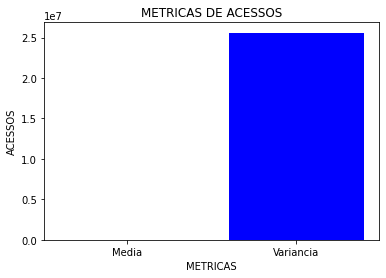

In [7]:
colunas = ['Media','Variancia']
vlr_colunas = [qtd_total_mediaAcessos, qtd_total_VarianciaAcessos]


plt.bar(colunas,vlr_colunas, color = 'blue')


plt.ylabel("ACESSOS")
plt.xlabel("METRICAS")
plt.title("METRICAS DE ACESSOS")
plt.show()

In [8]:
#METRICAS MES A MES: MES 1

somente_mes1 = dfAcesso['Mês'] == 1

dfAcesso_mes1 = dfAcesso[somente_mes1]


dfAcesso_mes1.sort_values(by = 'Acessos',
                          ascending = False).head(10)

Ano  Mês       Grupo Econômico               Empresa  \
3381478  2022    1      TELECOM AMERICAS                 CLARO   
3918959  2022    1        TELECOM ITALIA                   TIM   
3666859  2022    1            TELEFÔNICA                  VIVO   
2601863  2022    1            TELEFÔNICA                  VIVO   
4124955  2022    1      TELECOM AMERICAS                 CLARO   
3912956  2022    1        TELECOM ITALIA                   TIM   
3671905  2022    1            TELEFÔNICA                  VIVO   
3680860  2022    1  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   
3875443  2022    1      TELECOM AMERICAS                 CLARO   
2323868  2022    1  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   

                   CNPJ Porte da Prestadora  UF       Município  \
3381478  40432544000147        Grande Porte  SP       São Paulo   
3918959   2421421000111        Grande Porte  SP       São Paulo   
3666859   2558157000162        Grande Porte  SP       São Paulo   
2601863   2558157000162        Grande Porte  SP       São Paulo   
4124955  40432544000147        Grande Porte  RJ  Rio de Janeiro   
3912956   2421421000111        Grande Porte  SP       São Paulo   
3671905   2558157000162        Grande Porte  SP       São Paulo   
3680860  71208516000174       Pequeno Porte  SP          Franca   
3875443  40432544000147        Grande Porte  SP       São Paulo   
2323868  71208516000174       Pequeno Porte  SP          Franca   

         Código IBGE Município  Código Nacional  Código Nacional (Chip)  \
3381478                3550308               11                      11   
3918959                3550308               11                      11   
3666859                3550308               11                      11   
2601863                3550308               11                      11   
4124955                3304557               21                      21   
3912956                3550308               11                      11   
3671905                3550308               11                      11   
3680860                3516200               16                      16   
3875443                3550308               11                      11   
2323868                3516200               16                      16   

        Modalidade de Cobrança Tecnologia Tecnologia Geração   Tipo de Pessoa  \
3381478               Pós-pago        LTE                 4G    Pessoa Física   
3918959               Pré-pago        LTE                 4G    Pessoa Física   
3666859               Pós-pago        GSM                 2G  Pessoa Jurídica   
2601863               Pós-pago        LTE                 4G    Pessoa Física   
4124955               Pós-pago        LTE                 4G    Pessoa Física   
3912956               Pós-pago        LTE                 4G    Pessoa Física   
3671905               Pós-pago      WCDMA                 3G  Pessoa Jurídica   
3680860               Pós-pago        LTE                 4G  Pessoa Jurídica   
3875443               Pré-pago        LTE                 4G    Pessoa Física   
2323868               Pós-pago        LTE                 4G  Pessoa Jurídica   

          Tipo de Produto  Acessos  
3381478         VOZ+DADOS  2585514  
3918959         VOZ+DADOS  2231025  
3666859  PONTO_DE_SERVICO  1846851  
2601863         VOZ+DADOS  1802384  
4124955         VOZ+DADOS  1538132  
3912956         VOZ+DADOS  1434328  
3671905  PONTO_DE_SERVICO  1411494  
3680860  PONTO_DE_SERVICO  1233390  
3875443         VOZ+DADOS  1166764  
2323868               M2M  1084778

In [9]:
dfAcesso_mes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097631 entries, 2034632 to 4132262
Data columns (total 17 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Ano                     int64 
 1   Mês                     int64 
 2   Grupo Econômico         object
 3   Empresa                 object
 4   CNPJ                    int64 
 5   Porte da Prestadora     object
 6   UF                      object
 7   Município               object
 8   Código IBGE Município   int64 
 9   Código Nacional         int64 
 10  Código Nacional (Chip)  int64 
 11  Modalidade de Cobrança  object
 12  Tecnologia              object
 13  Tecnologia Geração      object
 14  Tipo de Pessoa          object
 15  Tipo de Produto         object
 16  Acessos                 int64 
dtypes: int64(7), object(10)
memory usage: 288.1+ MB


In [10]:
#METRICAS SOBRE A QUANTIDADE TOTAL DE ACESSOS SOMENTE DO MÊS 1:

qtd_totalAcessos_mes1 = dfAcesso_mes1['Acessos'].sum()
qtd_total_mediaAcessos_mes1 = dfAcesso_mes1['Acessos'].mean()
qtd_total_medianaAcessos_mes1 = dfAcesso_mes1['Acessos'].median()
qtd_total_DesvioPadraoAcessos_mes1 = dfAcesso_mes1['Acessos'].std()
qtd_total_VarianciaAcessos_mes1 = dfAcesso_mes1['Acessos'].var()

print(f"Qtd total de Acessos Janeiro: {qtd_totalAcessos_mes1}")
print(f"Media total de Acessos Janeiro: {qtd_total_mediaAcessos_mes1}")
print(f"Mediana de Acessos Janeiro: {qtd_total_medianaAcessos_mes1}")
print(f"Variancia de Acessos Janeiro: {qtd_total_VarianciaAcessos_mes1}")
print(f"Desvio Padrão de Acessos Janeiro: {qtd_total_DesvioPadraoAcessos_mes1}")

Qtd total de Acessos Janeiro: 255668569
Media total de Acessos Janeiro: 121.88443486962197
Mediana de Acessos Janeiro: 2.0
Variancia de Acessos Janeiro: 24748391.88019666
Desvio Padrão de Acessos Janeiro: 4974.775560786302


In [11]:
#METRICAS MES A MES: MES 2

somente_mes2 = dfAcesso['Mês'] == 2

dfAcesso_mes2 = dfAcesso[somente_mes2]


dfAcesso_mes2.sort_values(by = 'Acessos',
                          ascending = False).head(10)

Ano  Mês       Grupo Econômico               Empresa  \
1102524  2022    2      TELECOM AMERICAS                 CLARO   
1994677  2022    2        TELECOM ITALIA                   TIM   
1903528  2022    2            TELEFÔNICA                  VIVO   
819733   2022    2            TELEFÔNICA                  VIVO   
158666   2022    2      TELECOM AMERICAS                 CLARO   
1957640  2022    2        TELECOM ITALIA                   TIM   
1931245  2022    2            TELEFÔNICA                  VIVO   
1934220  2022    2  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   
1173160  2022    2      TELECOM AMERICAS                 CLARO   
77440    2022    2  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   

                   CNPJ Porte da Prestadora  UF       Município  \
1102524  40432544000147        Grande Porte  SP       São Paulo   
1994677   2421421000111        Grande Porte  SP       São Paulo   
1903528   2558157000162        Grande Porte  SP       São Paulo   
819733    2558157000162        Grande Porte  SP       São Paulo   
158666   40432544000147        Grande Porte  RJ  Rio de Janeiro   
1957640   2421421000111        Grande Porte  SP       São Paulo   
1931245   2558157000162        Grande Porte  SP       São Paulo   
1934220  71208516000174       Pequeno Porte  SP          Franca   
1173160  40432544000147        Grande Porte  SP       São Paulo   
77440    71208516000174       Pequeno Porte  SP          Franca   

         Código IBGE Município  Código Nacional  Código Nacional (Chip)  \
1102524                3550308               11                      11   
1994677                3550308               11                      11   
1903528                3550308               11                      11   
819733                 3550308               11                      11   
158666                 3304557               21                      21   
1957640                3550308               11                      11   
1931245                3550308               11                      11   
1934220                3516200               16                      16   
1173160                3550308               11                      11   
77440                  3516200               16                      16   

        Modalidade de Cobrança Tecnologia Tecnologia Geração   Tipo de Pessoa  \
1102524               Pós-pago        LTE                 4G    Pessoa Física   
1994677               Pré-pago        LTE                 4G    Pessoa Física   
1903528               Pós-pago        GSM                 2G  Pessoa Jurídica   
819733                Pós-pago        LTE                 4G    Pessoa Física   
158666                Pós-pago        LTE                 4G    Pessoa Física   
1957640               Pós-pago        LTE                 4G    Pessoa Física   
1931245               Pós-pago      WCDMA                 3G  Pessoa Jurídica   
1934220               Pós-pago        LTE                 4G  Pessoa Jurídica   
1173160               Pré-pago        LTE                 4G    Pessoa Física   
77440                 Pós-pago        LTE                 4G  Pessoa Jurídica   

          Tipo de Produto  Acessos  
1102524         VOZ+DADOS  2545090  
1994677         VOZ+DADOS  2220702  
1903528  PONTO_DE_SERVICO  1843119  
819733          VOZ+DADOS  1808847  
158666          VOZ+DADOS  1578914  
1957640         VOZ+DADOS  1442626  
1931245  PONTO_DE_SERVICO  1387290  
1934220  PONTO_DE_SERVICO  1272861  
1173160         VOZ+DADOS  1138533  
77440                 M2M  1132279

In [12]:
dfAcesso_mes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034632 entries, 0 to 2034631
Data columns (total 17 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Ano                     int64 
 1   Mês                     int64 
 2   Grupo Econômico         object
 3   Empresa                 object
 4   CNPJ                    int64 
 5   Porte da Prestadora     object
 6   UF                      object
 7   Município               object
 8   Código IBGE Município   int64 
 9   Código Nacional         int64 
 10  Código Nacional (Chip)  int64 
 11  Modalidade de Cobrança  object
 12  Tecnologia              object
 13  Tecnologia Geração      object
 14  Tipo de Pessoa          object
 15  Tipo de Produto         object
 16  Acessos                 int64 
dtypes: int64(7), object(10)
memory usage: 279.4+ MB


In [13]:
#METRICAS SOBRE A QUANTIDADE TOTAL DE ACESSOS SOMENTE DO MÊS 2:

qtd_totalAcessos_mes2 = dfAcesso_mes2['Acessos'].sum()
qtd_total_mediaAcessos_mes2 = dfAcesso_mes2['Acessos'].mean()
qtd_total_medianaAcessos_mes2 = dfAcesso_mes2['Acessos'].median()
qtd_total_DesvioPadraoAcessos_mes2 = dfAcesso_mes2['Acessos'].std()
qtd_total_VarianciaAcessos_mes2 = dfAcesso_mes2['Acessos'].var()

print(f"Qtd total de Acessos Fevereiro: {qtd_totalAcessos_mes2}")
print(f"Media total de Acessos Fevereiro: {qtd_total_mediaAcessos_mes2}")
print(f"Mediana de Acessos Fevereiro: {qtd_total_medianaAcessos_mes2}")
print(f"Variancia de Acessos Fevereiro: {qtd_total_VarianciaAcessos_mes2}")
print(f"Desvio Padrão de Acessos Fevereiro: {qtd_total_DesvioPadraoAcessos_mes2}")

Qtd total de Acessos Fevereiro: 256443920
Media total de Acessos Fevereiro: 126.039460698544
Mediana de Acessos Fevereiro: 2.0
Variancia de Acessos Fevereiro: 26460738.15614336
Desvio Padrão de Acessos Fevereiro: 5144.000209578471


In [14]:
# COMO O MEU COMPUTADOR (EM: 04.2022) NÃO AGUENTA O PIPOCO RSRS IREI FAZER UM SLICE DOS 100 PRIMEIROS REGISTROS DE CADA MÊS
# FUNÇÃO nlargest retorna as primeiras n linhas com os maiores valores baseado em alguma coluna

dfAcesso_SliceMes1 = dfAcesso_mes1.nlargest(100, 'Acessos')
dfAcesso_SliceMes2 = dfAcesso_mes2.nlargest(100, 'Acessos')

In [15]:
#TIRANDO AS METRICAS MES A MES DOS SLICES:


# METRICAS REFERENTES AO SLICE DO MES 1
qtd_totalAcessos_Slicemes1 = dfAcesso_SliceMes1['Acessos'].sum()
qtd_total_mediaAcessos_Slicemes1 = dfAcesso_SliceMes1['Acessos'].mean()
qtd_total_medianaAcessos_Slicemes1 = dfAcesso_SliceMes1['Acessos'].median()
qtd_total_DesvioPadraoAcessos_Slicemes1 = dfAcesso_SliceMes1['Acessos'].std()
qtd_total_VarianciaAcessos_Slicemes1 = dfAcesso_SliceMes1['Acessos'].var()

# METRICAS REFERENTES AO SLICE DO MES 2
qtd_totalAcessos_Slicemes2 = dfAcesso_SliceMes2['Acessos'].sum()
qtd_total_mediaAcessos_Slicemes2 = dfAcesso_SliceMes2['Acessos'].mean()
qtd_total_medianaAcessos_Slicemes2 = dfAcesso_SliceMes2['Acessos'].median()
qtd_total_DesvioPadraoAcessos_Slicemes2 = dfAcesso_SliceMes2['Acessos'].std()
qtd_total_VarianciaAcessos_Slicemes2 = dfAcesso_SliceMes2['Acessos'].var()

#IMPRINDO AS METRICAS:

#IMPRESSÃO DOS DADOS REFERENTES AO MÊS 1:
print(f"Qtd total de Acessos (100 registros) Janeiro: {qtd_totalAcessos_Slicemes1}")
print(f"Media total de Acessos (100 registros) Janeiro: {qtd_total_mediaAcessos_Slicemes1}")
print(f"Mediana de Acessos (100 registros) Janeiro: {qtd_total_medianaAcessos_Slicemes1}")
print(f"Variancia de Acessos (100 registros) Janeiro: {qtd_total_VarianciaAcessos_Slicemes1}")
print(f"Desvio Padrão de Acessos (100 registros) Janeiro: {qtd_total_DesvioPadraoAcessos_Slicemes1}")

print("\n")

#IMPRESSÃO DOS DADOS REFERENTES AO MÊS 2:
print(f"Qtd total de Acessos (100 registros) Fevereiro : {qtd_totalAcessos_Slicemes2}")
print(f"Media total de Acessos (100 registros) Fevereiro: {qtd_total_mediaAcessos_Slicemes2}")
print(f"Mediana de Acessos (100 registros) Fevereiro: {qtd_total_medianaAcessos_Slicemes2}")
print(f"Variancia de Acessos (100 registros) Fevereiro: {qtd_total_VarianciaAcessos_Slicemes2}")
print(f"Desvio Padrão de Acessos (100 registros) Fevereiro: {qtd_total_DesvioPadraoAcessos_Slicemes2}")

Qtd total de Acessos (100 registros) Janeiro: 50516169
Media total de Acessos (100 registros) Janeiro: 505161.69
Mediana de Acessos (100 registros) Janeiro: 327059.5
Variancia de Acessos (100 registros) Janeiro: 194464621415.00394
Desvio Padrão de Acessos (100 registros) Janeiro: 440981.42978475173


Qtd total de Acessos (100 registros) Fevereiro : 52405128
Media total de Acessos (100 registros) Fevereiro: 524051.28
Mediana de Acessos (100 registros) Fevereiro: 358886.5
Variancia de Acessos (100 registros) Fevereiro: 191104747094.54697
Desvio Padrão de Acessos (100 registros) Fevereiro: 437155.289450496


In [16]:
dfAcesso_SliceMes1.sort_values(by = 'Acessos',
                          ascending = False).head(10)

Ano  Mês       Grupo Econômico               Empresa  \
3381478  2022    1      TELECOM AMERICAS                 CLARO   
3918959  2022    1        TELECOM ITALIA                   TIM   
3666859  2022    1            TELEFÔNICA                  VIVO   
2601863  2022    1            TELEFÔNICA                  VIVO   
4124955  2022    1      TELECOM AMERICAS                 CLARO   
3912956  2022    1        TELECOM ITALIA                   TIM   
3671905  2022    1            TELEFÔNICA                  VIVO   
3680860  2022    1  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   
3875443  2022    1      TELECOM AMERICAS                 CLARO   
2323868  2022    1  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   

                   CNPJ Porte da Prestadora  UF       Município  \
3381478  40432544000147        Grande Porte  SP       São Paulo   
3918959   2421421000111        Grande Porte  SP       São Paulo   
3666859   2558157000162        Grande Porte  SP       São Paulo   
2601863   2558157000162        Grande Porte  SP       São Paulo   
4124955  40432544000147        Grande Porte  RJ  Rio de Janeiro   
3912956   2421421000111        Grande Porte  SP       São Paulo   
3671905   2558157000162        Grande Porte  SP       São Paulo   
3680860  71208516000174       Pequeno Porte  SP          Franca   
3875443  40432544000147        Grande Porte  SP       São Paulo   
2323868  71208516000174       Pequeno Porte  SP          Franca   

         Código IBGE Município  Código Nacional  Código Nacional (Chip)  \
3381478                3550308               11                      11   
3918959                3550308               11                      11   
3666859                3550308               11                      11   
2601863                3550308               11                      11   
4124955                3304557               21                      21   
3912956                3550308               11                      11   
3671905                3550308               11                      11   
3680860                3516200               16                      16   
3875443                3550308               11                      11   
2323868                3516200               16                      16   

        Modalidade de Cobrança Tecnologia Tecnologia Geração   Tipo de Pessoa  \
3381478               Pós-pago        LTE                 4G    Pessoa Física   
3918959               Pré-pago        LTE                 4G    Pessoa Física   
3666859               Pós-pago        GSM                 2G  Pessoa Jurídica   
2601863               Pós-pago        LTE                 4G    Pessoa Física   
4124955               Pós-pago        LTE                 4G    Pessoa Física   
3912956               Pós-pago        LTE                 4G    Pessoa Física   
3671905               Pós-pago      WCDMA                 3G  Pessoa Jurídica   
3680860               Pós-pago        LTE                 4G  Pessoa Jurídica   
3875443               Pré-pago        LTE                 4G    Pessoa Física   
2323868               Pós-pago        LTE                 4G  Pessoa Jurídica   

          Tipo de Produto  Acessos  
3381478         VOZ+DADOS  2585514  
3918959         VOZ+DADOS  2231025  
3666859  PONTO_DE_SERVICO  1846851  
2601863         VOZ+DADOS  1802384  
4124955         VOZ+DADOS  1538132  
3912956         VOZ+DADOS  1434328  
3671905  PONTO_DE_SERVICO  1411494  
3680860  PONTO_DE_SERVICO  1233390  
3875443         VOZ+DADOS  1166764  
2323868               M2M  1084778

In [17]:
dfAcesso_SliceMes2.sort_values(by = 'Acessos',
                          ascending = False).head(10)

Ano  Mês       Grupo Econômico               Empresa  \
1102524  2022    2      TELECOM AMERICAS                 CLARO   
1994677  2022    2        TELECOM ITALIA                   TIM   
1903528  2022    2            TELEFÔNICA                  VIVO   
819733   2022    2            TELEFÔNICA                  VIVO   
158666   2022    2      TELECOM AMERICAS                 CLARO   
1957640  2022    2        TELECOM ITALIA                   TIM   
1931245  2022    2            TELEFÔNICA                  VIVO   
1934220  2022    2  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   
1173160  2022    2      TELECOM AMERICAS                 CLARO   
77440    2022    2  ALGAR (CTBC TELECOM)  ALGAR (CTBC TELECOM)   

                   CNPJ Porte da Prestadora  UF       Município  \
1102524  40432544000147        Grande Porte  SP       São Paulo   
1994677   2421421000111        Grande Porte  SP       São Paulo   
1903528   2558157000162        Grande Porte  SP       São Paulo   
819733    2558157000162        Grande Porte  SP       São Paulo   
158666   40432544000147        Grande Porte  RJ  Rio de Janeiro   
1957640   2421421000111        Grande Porte  SP       São Paulo   
1931245   2558157000162        Grande Porte  SP       São Paulo   
1934220  71208516000174       Pequeno Porte  SP          Franca   
1173160  40432544000147        Grande Porte  SP       São Paulo   
77440    71208516000174       Pequeno Porte  SP          Franca   

         Código IBGE Município  Código Nacional  Código Nacional (Chip)  \
1102524                3550308               11                      11   
1994677                3550308               11                      11   
1903528                3550308               11                      11   
819733                 3550308               11                      11   
158666                 3304557               21                      21   
1957640                3550308               11                      11   
1931245                3550308               11                      11   
1934220                3516200               16                      16   
1173160                3550308               11                      11   
77440                  3516200               16                      16   

        Modalidade de Cobrança Tecnologia Tecnologia Geração   Tipo de Pessoa  \
1102524               Pós-pago        LTE                 4G    Pessoa Física   
1994677               Pré-pago        LTE                 4G    Pessoa Física   
1903528               Pós-pago        GSM                 2G  Pessoa Jurídica   
819733                Pós-pago        LTE                 4G    Pessoa Física   
158666                Pós-pago        LTE                 4G    Pessoa Física   
1957640               Pós-pago        LTE                 4G    Pessoa Física   
1931245               Pós-pago      WCDMA                 3G  Pessoa Jurídica   
1934220               Pós-pago        LTE                 4G  Pessoa Jurídica   
1173160               Pré-pago        LTE                 4G    Pessoa Física   
77440                 Pós-pago        LTE                 4G  Pessoa Jurídica   

          Tipo de Produto  Acessos  
1102524         VOZ+DADOS  2545090  
1994677         VOZ+DADOS  2220702  
1903528  PONTO_DE_SERVICO  1843119  
819733          VOZ+DADOS  1808847  
158666          VOZ+DADOS  1578914  
1957640         VOZ+DADOS  1442626  
1931245  PONTO_DE_SERVICO  1387290  
1934220  PONTO_DE_SERVICO  1272861  
1173160         VOZ+DADOS  1138533  
77440                 M2M  1132279

In [18]:
print(dfAcesso_SliceMes1['Acessos'].max())

print(dfAcesso_SliceMes1['Acessos'].min())

print('\n')

#mes 2:
print(dfAcesso_SliceMes2['Acessos'].max())

print(dfAcesso_SliceMes2['Acessos'].min())

2585514
205580


2545090
220614


In [19]:
#analisando como fatiar os outliers

somente1 = dfAcesso_SliceMes1['Acessos'] < 300000

dfAcessoTeste = dfAcesso_SliceMes1[somente1]

dfAcessoTeste.sort_values(by = 'Acessos',
                          ascending = True).head(100)

Ano  Mês   Grupo Econômico Empresa            CNPJ  \
3498560  2022    1                OI      OI   5423963000111   
3444794  2022    1                OI      OI   5423963000111   
3397837  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3832148  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2592472  2022    1        TELEFÔNICA    VIVO   2558157000162   
3769805  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3609292  2022    1                OI      OI   5423963000111   
2581403  2022    1        TELEFÔNICA    VIVO   2558157000162   
2256269  2022    1    TELECOM ITALIA     TIM   2421421000111   
3359172  2022    1                OI      OI   5423963000111   
3228837  2022    1                OI      OI   5423963000111   
2307150  2022    1        TELEFÔNICA    VIVO   2558157000162   
3760726  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2309925  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2944454  2022    1    TELECOM ITALIA     TIM   2421421000111   
2734511  2022    1        TELEFÔNICA    VIVO   2558157000162   
3877536  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3817179  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3399919  2022    1                OI      OI   5423963000111   
3940913  2022    1    TELECOM ITALIA     TIM   2421421000111   
3949257  2022    1    TELECOM ITALIA     TIM   2421421000111   
2255278  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3456943  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2888390  2022    1    TELECOM ITALIA     TIM   2421421000111   
3612988  2022    1                OI      OI   5423963000111   
3436281  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2623561  2022    1        TELEFÔNICA    VIVO   2558157000162   
2250459  2022    1    TELECOM ITALIA     TIM   2421421000111   
2255239  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3551185  2022    1    TELECOM ITALIA     TIM   2421421000111   
3475371  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2048041  2022    1        TELEFÔNICA    VIVO   2558157000162   
2256595  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3994010  2022    1    TELECOM ITALIA     TIM   2421421000111   
3810103  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2170539  2022    1        TELEFÔNICA    VIVO   2558157000162   
4057502  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3659323  2022    1        TELEFÔNICA    VIVO   2558157000162   
4053994  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
2046317  2022    1        TELEFÔNICA    VIVO   2558157000162   
3745018  2022    1    TELECOM ITALIA     TIM   2421421000111   

        Porte da Prestadora  UF              Município  Código IBGE Município  \
3498560        Grande Porte  AL                 Maceió                2704302   
3444794        Grande Porte  MA               São Luís                2111300   
3397837        Grande Porte  AM                 Manaus                1302603   
3832148        Grande Porte  PR               Curitiba                4106902   
2592472        Grande Porte  MG         Belo Horizonte                3106200   
3769805        Grande Porte  CE              Fortaleza                2304400   
3609292        Grande Porte  MG         Belo Horizonte                3106200   
2581403        Grande Porte  DF               Brasília                5300108   
2256269        Grande Porte  SP  São José do Rio Preto                3549805   
3359172        Grande Porte  SP              São Paulo                3550308   
3228837        Grande Porte  CE              Fortaleza                2304400   
2307150        Grande Porte  MG         Belo Horizonte                3106200   
3760726        Grande Porte  PI               Teresina                2211001   
2309925        Grande Porte  PR               Curitiba                4106902   
2944454        Grande Porte  BA               Salvador                2927408   
2734511        Grande Por

In [20]:
#analisando como fatiar os outliers

somente2 = dfAcesso_SliceMes2['Acessos'] < 300000

dfAcessoTeste = dfAcesso_SliceMes2[somente2]

dfAcessoTeste.sort_values(by = 'Acessos',
                          ascending = False).head(10)

Ano  Mês   Grupo Econômico Empresa            CNPJ  \
1547618  2022    2                OI      OI   5423963000111   
1622684  2022    2                OI      OI   5423963000111   
209414   2022    2  TELECOM AMERICAS   CLARO  40432544000147   
1184928  2022    2  TELECOM AMERICAS   CLARO  40432544000147   
1994514  2022    2    TELECOM ITALIA     TIM   2421421000111   
751718   2022    2                OI      OI   5423963000111   
1927804  2022    2        TELEFÔNICA    VIVO   2558157000162   
278704   2022    2        TELEFÔNICA    VIVO   2558157000162   
282907   2022    2        TELEFÔNICA    VIVO   2558157000162   
566286   2022    2    TELECOM ITALIA     TIM   2421421000111   

        Porte da Prestadora  UF         Município  Código IBGE Município  \
1547618        Grande Porte  PB       João Pessoa                2507507   
1622684        Grande Porte  MA          São Luís                2111300   
209414         Grande Porte  SP           Barueri                3505708   
1184928        Grande Porte  PE            Recife                2611606   
1994514        Grande Porte  MG    Belo Horizonte                3106200   
751718         Grande Porte  RJ    Rio de Janeiro                3304557   
1927804        Grande Porte  SP         São Paulo                3550308   
278704         Grande Porte  SP         São Paulo                3550308   
282907         Grande Porte  SP  Francisco Morato                3516309   
566286         Grande Porte  CE         Fortaleza                2304400   

         Código Nacional  Código Nacional (Chip) Modalidade de Cobrança  \
1547618               83                      83               Pré-pago   
1622684               98                      98               Pré-pago   
209414                11                      54               Pós-pago   
1184928               81                      81               Pré-pago   
1994514               31                      31               Pós-pago   
751718                21                      21               Pós-pago   
1927804               11                      11               Pós-pago   
278704                11                      11               Pós-pago   
282907                11                      11               Pós-pago   
566286                85                      85               Pós-pago   

        Tecnologia Tecnologia Geração   Tipo de Pessoa   Tipo de Produto  \
1547618        LTE                 4G    Pessoa Física               VOZ   
1622684        LTE                 4G    Pessoa Física               VOZ   
209414       WCDMA                 3G  Pessoa Jurídica  PONTO_DE_SERVICO   
1184928        LTE                 4G    Pessoa Física         VOZ+DADOS   
1994514        LTE                 4G    Pessoa Física         VOZ+DADOS   
751718         LTE                 4G    Pessoa Física         VOZ+DADOS   
1927804        LTE                 4G  Pessoa Jurídica  PONTO_DE_SERVICO   
278704       WCDMA                 3G  Pessoa Jurídica             DADOS   
282907         GSM                 2G  Pessoa Jurídica               M2M   
566286         LTE                 4G    Pessoa Física         VOZ+DADOS   

         Acessos  
1547618   299597  
1622684   299163  
209414    296093  
1184928   295528  
1994514   293350  
751718    292838  
1927804   287108  
278704    284108  
282907    271180  
566286    270452

In [21]:
# NOS DOIS DATASET COM OS SLICE, TEMOS DADOS DE ACESSOS MUITOS DESCREPANTES, IREI FAZER UM DROP (APAGAR) ESSES DADOS
# IREI APAGAR OS ACESSOS QUE ESTÃO ACIMA DOS 300.000 ACESSOS NOS DOIS DATASETS

indice_mes1 = dfAcesso_SliceMes1[dfAcesso_SliceMes1.Acessos > 300000].index #pegando somente o indice do outlier do mes 1 e salvando na variavel indice_mes1
indice_mes2 = dfAcesso_SliceMes2[dfAcesso_SliceMes2.Acessos > 300000].index #pegando somente o indice do outlier do mes 2 e salvando na variavel indice_mes2

print(f"indice_mes1: {indice_mes1}") #imprindo os indeces que estão acima dos 50 acessos do mês 1
print(f"indice_mes2: {indice_mes2}") #imprindo os indeces que estão acima dos 50 acessos do mês 2

indice_mes1: Int64Index([3381478, 3918959, 3666859, 2601863, 4124955, 3912956, 3671905,
            3680860, 3875443, 2323868, 3475921, 3010201, 3981823, 2924717,
            3703764, 3911325, 2250306, 3466060, 2624108, 2255120, 2366091,
            2414224, 3425147, 3728351, 2352324, 3694683, 3404224, 3907246,
            2723410, 2304749, 2058514, 2477267, 2816616, 3514376, 3854652,
            3790673, 3418113, 3811725, 3816192, 4087763, 3727823, 2662422,
            4107114, 3711077, 3528086, 3481607, 3394900, 2690743, 3705236,
            3444832, 3439938, 4036507, 3460815, 3638508, 3861715, 4082957,
            3395961, 2244135, 3579417],
           dtype='int64')
indice_mes2: Int64Index([1102524, 1994677, 1903528,  819733,  158666, 1957640, 1931245,
            1934220, 1173160,   77440, 1174505,  802324,  565995,  846577,
            1684647,  198469, 2002156, 1657545,  215235, 1859588, 1670091,
             609772,  843089,  187973,  272923, 1602390,  296661,  211553,
        

In [22]:
# apagando o outlier dos nossos dados;
# o inplace igual a FALSE que retornará uma copia e não subescrever a variaveis originais (dfAcesso_SliceMes1 e dfAcesso_SliceMes2)
# salvando as copias em dfAcesso_SliceMes1_FilOutliers e dfAcesso_SliceMes2_FilOutliers

dfAcesso_SliceMes1_FilOutliers = dfAcesso_SliceMes1.drop(indice_mes1, inplace = False)
dfAcesso_SliceMes2_FilOutliers = dfAcesso_SliceMes2.drop(indice_mes2, inplace = False)

In [23]:
dfAcesso_SliceMes1_FilOutliers.sort_values(by = 'Acessos',
                                           ascending = False).head(5) #ordernando noavamente do maior p/ o menor valor

Ano  Mês   Grupo Econômico Empresa            CNPJ  \
3745018  2022    1    TELECOM ITALIA     TIM   2421421000111   
2046317  2022    1        TELEFÔNICA    VIVO   2558157000162   
4053994  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
3659323  2022    1        TELEFÔNICA    VIVO   2558157000162   
4057502  2022    1  TELECOM AMERICAS   CLARO  40432544000147   

        Porte da Prestadora  UF       Município  Código IBGE Município  \
3745018        Grande Porte  MG  Belo Horizonte                3106200   
2046317        Grande Porte  SP       São Paulo                3550308   
4053994        Grande Porte  SP        Campinas                3509502   
3659323        Grande Porte  SP       São Paulo                3550308   
4057502        Grande Porte  PE          Recife                2611606   

         Código Nacional  Código Nacional (Chip) Modalidade de Cobrança  \
3745018               31                      31               Pós-pago   
2046317               11                      11               Pós-pago   
4053994               19                      19               Pós-pago   
3659323               11                      11               Pós-pago   
4057502               81                      81               Pré-pago   

        Tecnologia Tecnologia Geração   Tipo de Pessoa   Tipo de Produto  \
3745018        LTE                 4G    Pessoa Física         VOZ+DADOS   
2046317      WCDMA                 3G  Pessoa Jurídica             DADOS   
4053994        LTE                 4G    Pessoa Física         VOZ+DADOS   
3659323        LTE                 4G  Pessoa Jurídica  PONTO_DE_SERVICO   
4057502        LTE                 4G    Pessoa Física         VOZ+DADOS   

         Acessos  
3745018   291501  
2046317   288451  
4053994   280439  
3659323   279217  
4057502   278084

In [24]:
dfAcesso_SliceMes2_FilOutliers.sort_values(by = 'Acessos',
                                           ascending = False).head(5) #ordernando noavamente do maior p/ o menor valor

Ano  Mês   Grupo Econômico Empresa            CNPJ  \
1547618  2022    2                OI      OI   5423963000111   
1622684  2022    2                OI      OI   5423963000111   
209414   2022    2  TELECOM AMERICAS   CLARO  40432544000147   
1184928  2022    2  TELECOM AMERICAS   CLARO  40432544000147   
1994514  2022    2    TELECOM ITALIA     TIM   2421421000111   

        Porte da Prestadora  UF       Município  Código IBGE Município  \
1547618        Grande Porte  PB     João Pessoa                2507507   
1622684        Grande Porte  MA        São Luís                2111300   
209414         Grande Porte  SP         Barueri                3505708   
1184928        Grande Porte  PE          Recife                2611606   
1994514        Grande Porte  MG  Belo Horizonte                3106200   

         Código Nacional  Código Nacional (Chip) Modalidade de Cobrança  \
1547618               83                      83               Pré-pago   
1622684               98                      98               Pré-pago   
209414                11                      54               Pós-pago   
1184928               81                      81               Pré-pago   
1994514               31                      31               Pós-pago   

        Tecnologia Tecnologia Geração   Tipo de Pessoa   Tipo de Produto  \
1547618        LTE                 4G    Pessoa Física               VOZ   
1622684        LTE                 4G    Pessoa Física               VOZ   
209414       WCDMA                 3G  Pessoa Jurídica  PONTO_DE_SERVICO   
1184928        LTE                 4G    Pessoa Física         VOZ+DADOS   
1994514        LTE                 4G    Pessoa Física         VOZ+DADOS   

         Acessos  
1547618   299597  
1622684   299163  
209414    296093  
1184928   295528  
1994514   293350

In [25]:

# CALCULANDO AS METRICAS DO MES 1
qtd_totalAcessos_Slicemes1_FilOutliers = dfAcesso_SliceMes1_FilOutliers['Acessos'].sum()
qtd_total_mediaAcessos_Slicemes1_FilOutliers = dfAcesso_SliceMes1_FilOutliers['Acessos'].mean()
qtd_total_medianaAcessos_Slicemes1_FilOutliers = dfAcesso_SliceMes1_FilOutliers['Acessos'].median()
qtd_total_DesvioPadraoAcessos_Slicemes1_FilOutliers = dfAcesso_SliceMes1_FilOutliers['Acessos'].std()
qtd_total_VarianciaAcessos_Slicemes1_FilOutliers = dfAcesso_SliceMes1_FilOutliers['Acessos'].var()

# CALCULANDO AS METRICAS DO MES 2
qtd_totalAcessos_Slicemes2_FilOutliers = dfAcesso_SliceMes2_FilOutliers['Acessos'].sum()
qtd_total_mediaAcessos_Slicemes2_FilOutliers = dfAcesso_SliceMes2_FilOutliers['Acessos'].mean()
qtd_total_medianaAcessos_Slicemes2_FilOutliers = dfAcesso_SliceMes2_FilOutliers['Acessos'].median()
qtd_total_DesvioPadraoAcessos_Slicemes2_FilOutliers = dfAcesso_SliceMes2_FilOutliers['Acessos'].std()
qtd_total_VarianciaAcessos_Slicemes2_FilOutliers = dfAcesso_SliceMes2_FilOutliers['Acessos'].var()

#IMPRINDO AS METRICAS:

#IMPRESSÃO DOS DADOS REFERENTES AO MÊS 1:
print(f"Qtd total de Acessos (100 registros e sem os outliers) Janeiro: {qtd_totalAcessos_Slicemes1_FilOutliers}")
print(f"Media total de Acessos (100 registros e sem os outliers) Janeiro: {qtd_total_mediaAcessos_Slicemes1_FilOutliers}")
print(f"Mediana de Acessos (100 registros e sem os outliers) Janeiro: {qtd_total_medianaAcessos_Slicemes1_FilOutliers}")
print(f"Variancia de Acessos (100 registros e sem os outliers) Janeiro: {qtd_total_VarianciaAcessos_Slicemes1_FilOutliers}")
print(f"Desvio Padrão de Acessos (100 registros e sem os outliers) Janeiro: {qtd_total_DesvioPadraoAcessos_Slicemes1_FilOutliers}")

print("\n")

#IMPRESSÃO DOS DADOS REFERENTES AO MÊS 2:
print(f"Qtd total de Acessos (100 registros e sem os outliers) Fevereiro : {qtd_totalAcessos_Slicemes2_FilOutliers}")
print(f"Media total de Acessos (100 registros e sem os outliers) Fevereiro: {qtd_total_mediaAcessos_Slicemes2_FilOutliers}")
print(f"Mediana de Acessos (100 registros e sem os outliers) Fevereiro: {qtd_total_medianaAcessos_Slicemes2_FilOutliers}")
print(f"Variancia de Acessos (100 registros e sem os outliers) Fevereiro: {qtd_total_VarianciaAcessos_Slicemes2_FilOutliers}")
print(f"Desvio Padrão de Acessos (100 registros e sem os outliers) Fevereiro: {qtd_total_DesvioPadraoAcessos_Slicemes2_FilOutliers}")

Qtd total de Acessos (100 registros e sem os outliers) Janeiro: 10111533
Media total de Acessos (100 registros e sem os outliers) Janeiro: 246622.75609756098
Mediana de Acessos (100 registros e sem os outliers) Janeiro: 245241.0
Variancia de Acessos (100 registros e sem os outliers) Janeiro: 566487681.5390242
Desvio Padrão de Acessos (100 registros e sem os outliers) Janeiro: 23801.001691925158


Qtd total de Acessos (100 registros e sem os outliers) Fevereiro : 9463317
Media total de Acessos (100 registros e sem os outliers) Fevereiro: 255765.32432432432
Mediana de Acessos (100 registros e sem os outliers) Fevereiro: 248466.0
Variancia de Acessos (100 registros e sem os outliers) Fevereiro: 592407092.503003
Desvio Padrão de Acessos (100 registros e sem os outliers) Fevereiro: 24339.414382909934


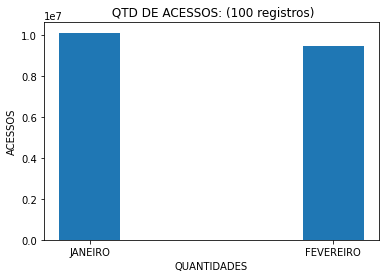

In [26]:

colunas = ['JANEIRO','FEVEREIRO']
vlr_colunas = [qtd_totalAcessos_Slicemes1_FilOutliers, qtd_totalAcessos_Slicemes2_FilOutliers]


plt.bar(colunas, vlr_colunas, width = 0.25)


plt.ylabel("ACESSOS")
plt.xlabel("QUANTIDADES")
plt.title(" QTD DE ACESSOS: (100 registros)")
plt.show()

In [27]:
# JUNTANDO OS DOIS DATAFREMES MES 1 E MES 2:
# ESSE METODO FOI ADOTADO POIS AS DUAS METRICAS ABAIXO JÁ ESTÃO "LIMPAS"
# IREI USAR A FUNÇÃO CONCET PARA COLOCAR 'UM EMBAIXO DO OUTRO' E CONTINUANDO A CONTAGEM DO INDICE

dfAcessosSlice_JanFev = pd.concat([dfAcesso_SliceMes1_FilOutliers, dfAcesso_SliceMes2_FilOutliers],
                                  ignore_index=False)

In [28]:
dfAcesso_SliceMes1_FilOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 3745018 to 3498560
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     41 non-null     int64 
 1   Mês                     41 non-null     int64 
 2   Grupo Econômico         41 non-null     object
 3   Empresa                 41 non-null     object
 4   CNPJ                    41 non-null     int64 
 5   Porte da Prestadora     41 non-null     object
 6   UF                      41 non-null     object
 7   Município               41 non-null     object
 8   Código IBGE Município   41 non-null     int64 
 9   Código Nacional         41 non-null     int64 
 10  Código Nacional (Chip)  41 non-null     int64 
 11  Modalidade de Cobrança  41 non-null     object
 12  Tecnologia              41 non-null     object
 13  Tecnologia Geração      41 non-null     object
 14  Tipo de Pessoa          41 non-null     object
 1

In [29]:
dfAcesso_SliceMes2_FilOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1547618 to 654514
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     37 non-null     int64 
 1   Mês                     37 non-null     int64 
 2   Grupo Econômico         37 non-null     object
 3   Empresa                 37 non-null     object
 4   CNPJ                    37 non-null     int64 
 5   Porte da Prestadora     37 non-null     object
 6   UF                      37 non-null     object
 7   Município               37 non-null     object
 8   Código IBGE Município   37 non-null     int64 
 9   Código Nacional         37 non-null     int64 
 10  Código Nacional (Chip)  37 non-null     int64 
 11  Modalidade de Cobrança  37 non-null     object
 12  Tecnologia              37 non-null     object
 13  Tecnologia Geração      37 non-null     object
 14  Tipo de Pessoa          37 non-null     object
 15

In [30]:
dfAcessosSlice_JanFev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 3745018 to 654514
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     78 non-null     int64 
 1   Mês                     78 non-null     int64 
 2   Grupo Econômico         78 non-null     object
 3   Empresa                 78 non-null     object
 4   CNPJ                    78 non-null     int64 
 5   Porte da Prestadora     78 non-null     object
 6   UF                      78 non-null     object
 7   Município               78 non-null     object
 8   Código IBGE Município   78 non-null     int64 
 9   Código Nacional         78 non-null     int64 
 10  Código Nacional (Chip)  78 non-null     int64 
 11  Modalidade de Cobrança  78 non-null     object
 12  Tecnologia              78 non-null     object
 13  Tecnologia Geração      78 non-null     object
 14  Tipo de Pessoa          78 non-null     object
 15

In [31]:
#METRICAS SOBRE A QUANTIDADE TOTAL DE ACESSOS:

qtd_totalAcessos_JanFev = dfAcessosSlice_JanFev['Acessos'].sum()
qtd_total_mediaAcessos_JanFev = dfAcessosSlice_JanFev['Acessos'].mean()
qtd_total_medianaAcessos_JanFev = dfAcessosSlice_JanFev['Acessos'].median()
qtd_total_DesvioPadraoAcessos_JanFev = dfAcessosSlice_JanFev['Acessos'].std()
qtd_total_VarianciaAcessos_JanFev = dfAcessosSlice_JanFev['Acessos'].var()

print(f"Qtd total de Acessos JanFev: {qtd_totalAcessos_JanFev}")
print(f"Media total de Acessos JanFev: {qtd_total_mediaAcessos_JanFev}")
print(f"Mediana de Acessos JanFev: {qtd_total_medianaAcessos_JanFev}")
print(f"Variancia de Acessos JanFev: {qtd_total_VarianciaAcessos_JanFev}")
print(f"Desvio Padrão de Acessos JanFev: {qtd_total_DesvioPadraoAcessos_JanFev}")

Qtd total de Acessos JanFev: 19574850
Media total de Acessos JanFev: 250959.61538461538
Mediana de Acessos JanFev: 247328.0
Variancia de Acessos JanFev: 592361219.4865136
Desvio Padrão de Acessos JanFev: 24338.47200393882


In [32]:
#VERIFICANDO OS ACESSOS POR ESTADO

dfAcessosSlice_JanFev[['UF', 'Acessos']]

UF  Acessos
3745018  MG   291501
2046317  SP   288451
4053994  SP   280439
3659323  SP   279217
4057502  PE   278084
...      ..      ...
1581075  AM   226401
796538   DF   223844
1889357  SP   223100
280491   MG   221750
654514   CE   220614

[78 rows x 2 columns]

In [33]:
# VALORES MEDIOS DE ACESSOS POR ESTADO

# agrupandos os valores por UF e calculando a media da coluna acessos e ordernando do maior p/valor de acessos
dfAcessos_estados = (dfAcessosSlice_JanFev.groupby('UF')['Acessos'].mean()).sort_values(ascending = False)

dfAcessos_estados # mostrando os valores

UF
PB    299597.000000
RJ    292838.000000
RO    267962.000000
RN    267124.000000
SP    258605.200000
PE    256517.500000
MA    252533.000000
RS    252511.250000
MS    251382.500000
DF    246299.666667
MG    246017.142857
BA    243246.833333
CE    241099.000000
PI    234291.000000
PR    226157.666667
AM    218481.000000
AL    205580.000000
Name: Acessos, dtype: float64

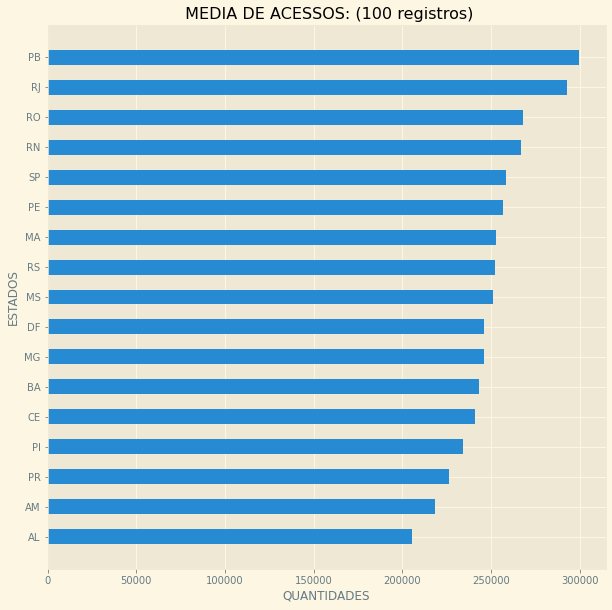

In [34]:
estados = dfAcessos_estados.index #no agrupamento as UF se tornaram os indices do novo dataframe
vlr_colunas = dfAcessos_estados

#Estilo do tema
plt.style.use('Solarize_Light2')

#tamnaho da figura do grafico
fig, ax = plt.subplots(figsize=(10,10))

# Barras na vertical
plt.barh(estados, vlr_colunas, align='center',  height = 0.50)
ax.invert_yaxis() #invertendo o eixo do grafico

plt.ylabel("ESTADOS")
plt.xlabel("QUANTIDADES")
plt.title(" MEDIA DE ACESSOS: (100 registros)")
plt.show()

In [35]:
# CARREGANDOS AS GEOCOLIZAÇÕES DOS MUNICIPIOS DO BR

dbLoc = ("C:/Users/Deusdedith Junior/Desktop/Bases/MunicipiosEstadosBrLatLog.csv")

In [36]:
dfLocMun = pd.read_csv(dbLoc,
                       sep =",",
                       encoding="utf-8")

In [37]:
dfLocMun.head(10)

codigo_ibge                 nome  latitude  longitude  capital  codigo_uf  \
0      5200050      Abadia de Goiás -16.75730   -49.4412        0         52   
1      3100104  Abadia dos Dourados -18.48310   -47.3916        0         31   
2      5200100            Abadiânia -16.19700   -48.7057        0         52   
3      3100203               Abaeté -19.15510   -45.4444        0         31   
4      1500107           Abaetetuba  -1.72183   -48.8788        0         15   
5      2300101              Abaiara  -7.34588   -39.0416        0         23   
6      2900108               Abaíra -13.24880   -41.6619        0         29   
7      2900207                Abaré  -8.72073   -39.1162        0         29   
8      4100103               Abatiá -23.30490   -50.3133        0         41   
9      4200051        Abdon Batista -27.61260   -51.0233        0         42   

   siafi_id  ddd       fuso_horario  
0      1050   62  America/Sao_Paulo  
1      4001   34  America/Sao_Paulo  
2      9201   62  America/Sao_Paulo  
3      4003   37  America/Sao_Paulo  
4       401   91  America/Sao_Paulo  
5      1301   88  America/Sao_Paulo  
6      3301   77  America/Sao_Paulo  
7      3303   75  America/Sao_Paulo  
8      7401   43  America/Sao_Paulo  
9      9939   49  America/Sao_Paulo

In [38]:
dfLocMun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo_ibge   5570 non-null   int64  
 1   nome          5570 non-null   object 
 2   latitude      5570 non-null   float64
 3   longitude     5570 non-null   float64
 4   capital       5570 non-null   int64  
 5   codigo_uf     5570 non-null   int64  
 6   siafi_id      5570 non-null   int64  
 7   ddd           5570 non-null   int64  
 8   fuso_horario  5570 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 391.8+ KB


In [39]:
# ALTERANDO OS NOMES DAS COLUNAS DO DATASET dfLocMun

dfLocMun = dfLocMun.rename(columns={'codigo_ibge': 'Código IBGE Município'})

In [40]:
dfLocMun.sample(3)

Código IBGE Município                  nome  latitude  longitude  \
728                 2502706             Borborema  -6.80199   -35.6187   
193                 2100600  Amarante do Maranhão  -5.56913   -46.7473   
1603                3122702          Dom Silvério -20.16270   -42.9627   

      capital  codigo_uf  siafi_id  ddd       fuso_horario  
728         0         25      1955   83  America/Sao_Paulo  
193         0         21       711   99  America/Sao_Paulo  
1603        0         31      4453   31  America/Sao_Paulo

In [41]:
# MISTURANDO OS DOIS DATASETS dfLocMun E dfAcessosSlice_JanFev USANDO A COLUNA CÓDIGO IBGE MUNICIPIO COMO BASE
# E LEVANDO EM CONSIDERAÇÃO QUE O TIPO DE MISTURA SERÁ DO TIPO left

dfAcessosLatLong = pd.merge(dfAcessosSlice_JanFev, dfLocMun[['Código IBGE Município','latitude', 'longitude']],
                     how = 'left',
                     on = 'Código IBGE Município')

In [42]:
dfAcessosLatLong.head()

Ano  Mês   Grupo Econômico Empresa            CNPJ Porte da Prestadora  \
0  2022    1    TELECOM ITALIA     TIM   2421421000111        Grande Porte   
1  2022    1        TELEFÔNICA    VIVO   2558157000162        Grande Porte   
2  2022    1  TELECOM AMERICAS   CLARO  40432544000147        Grande Porte   
3  2022    1        TELEFÔNICA    VIVO   2558157000162        Grande Porte   
4  2022    1  TELECOM AMERICAS   CLARO  40432544000147        Grande Porte   

   UF       Município  Código IBGE Município  Código Nacional  \
0  MG  Belo Horizonte                3106200               31   
1  SP       São Paulo                3550308               11   
2  SP        Campinas                3509502               19   
3  SP       São Paulo                3550308               11   
4  PE          Recife                2611606               81   

   Código Nacional (Chip) Modalidade de Cobrança Tecnologia  \
0                      31               Pós-pago        LTE   
1                      11               Pós-pago      WCDMA   
2                      19               Pós-pago        LTE   
3                      11               Pós-pago        LTE   
4                      81               Pré-pago        LTE   

  Tecnologia Geração   Tipo de Pessoa   Tipo de Produto  Acessos  latitude  \
0                 4G    Pessoa Física         VOZ+DADOS   291501 -19.91020   
1                 3G  Pessoa Jurídica             DADOS   288451 -23.53290   
2                 4G    Pessoa Física         VOZ+DADOS   280439 -22.90530   
3                 4G  Pessoa Jurídica  PONTO_DE_SERVICO   279217 -23.53290   
4                 4G    Pessoa Física         VOZ+DADOS   278084  -8.04666   

   longitude  
0   -43.9266  
1   -46.6395  
2   -47.0659  
3   -46.6395  
4   -34.8771

In [43]:
dfAcessosLatLong['geometry'] = None #iniciando a coluna vazia

#fazendo a iteração, onde para cada linha do dataframe(dfAcessos) irei criar um objeto do tipo Point, salvar na coluna geometry e naquela linha

#index -> indice; row -> linha; iterrows -> cada linha
for index, row in dfAcessosLatLong.iterrows(): 
    dfAcessosLatLong.loc[index, 'geometry'] = Point(row.longitude, row.latitude)

In [44]:
# TRANSFORMANDO O DATASET EM UM GEODATAFRAME
geoAcessos = gpd.GeoDataFrame(dfAcessosLatLong,
                              geometry = 'geometry')

In [45]:
type(dfAcessosLatLong)

pandas.core.frame.DataFrame

In [46]:
type(geoAcessos)

geopandas.geodataframe.GeoDataFrame

In [47]:
geoAcessos.head()

Ano  Mês   Grupo Econômico Empresa            CNPJ Porte da Prestadora  \
0  2022    1    TELECOM ITALIA     TIM   2421421000111        Grande Porte   
1  2022    1        TELEFÔNICA    VIVO   2558157000162        Grande Porte   
2  2022    1  TELECOM AMERICAS   CLARO  40432544000147        Grande Porte   
3  2022    1        TELEFÔNICA    VIVO   2558157000162        Grande Porte   
4  2022    1  TELECOM AMERICAS   CLARO  40432544000147        Grande Porte   

   UF       Município  Código IBGE Município  Código Nacional  \
0  MG  Belo Horizonte                3106200               31   
1  SP       São Paulo                3550308               11   
2  SP        Campinas                3509502               19   
3  SP       São Paulo                3550308               11   
4  PE          Recife                2611606               81   

   Código Nacional (Chip) Modalidade de Cobrança Tecnologia  \
0                      31               Pós-pago        LTE   
1                      11               Pós-pago      WCDMA   
2                      19               Pós-pago        LTE   
3                      11               Pós-pago        LTE   
4                      81               Pré-pago        LTE   

  Tecnologia Geração   Tipo de Pessoa   Tipo de Produto  Acessos  latitude  \
0                 4G    Pessoa Física         VOZ+DADOS   291501 -19.91020   
1                 3G  Pessoa Jurídica             DADOS   288451 -23.53290   
2                 4G    Pessoa Física         VOZ+DADOS   280439 -22.90530   
3                 4G  Pessoa Jurídica  PONTO_DE_SERVICO   279217 -23.53290   
4                 4G    Pessoa Física         VOZ+DADOS   278084  -8.04666   

   longitude                     geometry  
0   -43.9266  POINT (-43.92660 -19.91020)  
1   -46.6395  POINT (-46.63950 -23.53290)  
2   -47.0659  POINT (-47.06590 -22.90530)  
3   -46.6395  POINT (-46.63950 -23.53290)  
4   -34.8771   POINT (-34.87710 -8.04666)

In [48]:
geoAcessos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Ano                     78 non-null     int64   
 1   Mês                     78 non-null     int64   
 2   Grupo Econômico         78 non-null     object  
 3   Empresa                 78 non-null     object  
 4   CNPJ                    78 non-null     int64   
 5   Porte da Prestadora     78 non-null     object  
 6   UF                      78 non-null     object  
 7   Município               78 non-null     object  
 8   Código IBGE Município   78 non-null     int64   
 9   Código Nacional         78 non-null     int64   
 10  Código Nacional (Chip)  78 non-null     int64   
 11  Modalidade de Cobrança  78 non-null     object  
 12  Tecnologia              78 non-null     object  
 13  Tecnologia Geração      78 non-null     object  
 14  Tipo de Pessoa      

In [49]:
geoAcessos[['geometry', 'latitude', 'longitude', 'Município', 'Acessos']]

geometry  latitude  longitude              Município  \
0   POINT (-43.92660 -19.91020) -19.91020   -43.9266         Belo Horizonte   
1   POINT (-46.63950 -23.53290) -23.53290   -46.6395              São Paulo   
2   POINT (-47.06590 -22.90530) -22.90530   -47.0659               Campinas   
3   POINT (-46.63950 -23.53290) -23.53290   -46.6395              São Paulo   
4    POINT (-34.87710 -8.04666)  -8.04666   -34.8771                 Recife   
..                          ...       ...        ...                    ...   
73   POINT (-60.02120 -3.11866)  -3.11866   -60.0212                 Manaus   
74  POINT (-47.92970 -15.77950) -15.77950   -47.9297               Brasília   
75  POINT (-49.37580 -20.81130) -20.81130   -49.3758  São José do Rio Preto   
76  POINT (-43.92660 -19.91020) -19.91020   -43.9266         Belo Horizonte   
77   POINT (-38.54230 -3.71664)  -3.71664   -38.5423              Fortaleza   

    Acessos  
0    291501  
1    288451  
2    280439  
3    279217  
4    278084  
..      ...  
73   226401  
74   223844  
75   223100  
76   221750  
77   220614  

[78 rows x 5 columns]

<AxesSubplot:>

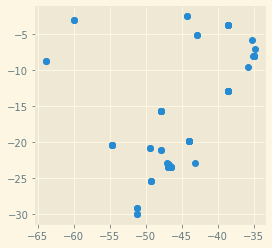

In [50]:
geoAcessos.plot()

In [51]:
#CARREGANDO O ARQUIVO GEOJSON QUE POSSUI OS POLIGNOS QUE FORMA OS MUNICIPIOS DO BRASIL

fileJson = "C:/Users/Deusdedith Junior/Desktop/pratica_Python/Digital_House/pratica/datasets/DadosMunicipios.json"

geoMunicipiosBR = gpd.read_file(fileJson,
                              driver = 'GeoJSON')

In [52]:
geoMunicipiosBR.head()

id                   name            description  \
0  1100015  Alta Floresta D'Oeste  Alta Floresta D'Oeste   
1  1100023              Ariquemes              Ariquemes   
2  1100031                 Cabixi                 Cabixi   
3  1100049                 Cacoal                 Cacoal   
4  1100056             Cerejeiras             Cerejeiras   

                                            geometry  
0  POLYGON ((-62.18209 -11.86686, -62.16230 -11.8...  
1  POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...  
2  POLYGON ((-60.39940 -13.45584, -60.40195 -13.4...  
3  POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...  
4  POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...

<AxesSubplot:>

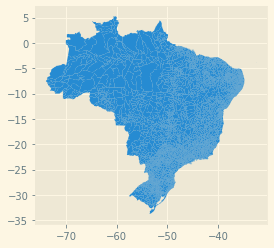

In [55]:
geoMunicipiosBR.plot()

<AxesSubplot:>

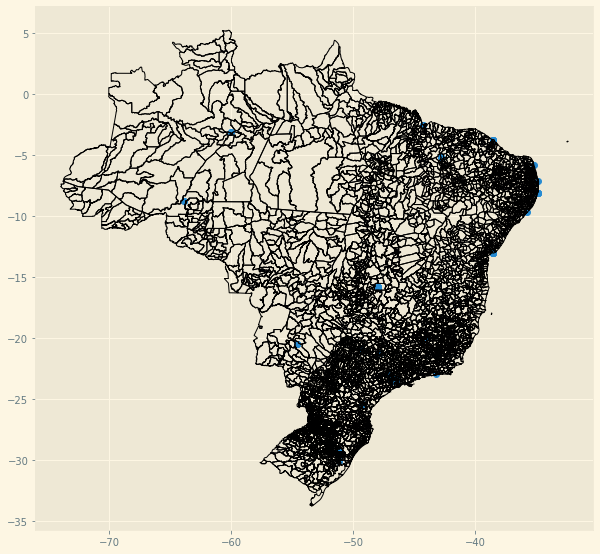

In [66]:

# PLOTANDO O ARQUIVOS GEOJSON SOBRE O GRAFICO DOS ESTADOS DO BR

fig, ax = plt.subplots(figsize=(10,10))

geoAcessos.plot(ax=ax)

geoMunicipiosBR.plot(ax=ax, facecolor="None", edgecolor="black")

In [56]:
dfAcesso.head()

Ano  Mês   Grupo Econômico Empresa            CNPJ Porte da Prestadora  \
0  2022    2        TELEFÔNICA    VIVO   2558157000162        Grande Porte   
1  2022    2  TELECOM AMERICAS   CLARO  40432544000147        Grande Porte   
2  2022    2    TELECOM ITALIA     TIM   2421421000111        Grande Porte   
3  2022    2    TELECOM ITALIA     TIM   2421421000111        Grande Porte   
4  2022    2        TELEFÔNICA    VIVO   2558157000162        Grande Porte   

   UF             Município  Código IBGE Município  Código Nacional  \
0  PE                Escada                2605202               81   
1  ES               Itarana                3202900               27   
2  CE              Milagres                2308302               88   
3  CE               Mombaça                2308500               88   
4  TO  Paraíso do Tocantins                1716109               63   

   Código Nacional (Chip) Modalidade de Cobrança Tecnologia  \
0                      75               Pós-pago        LTE   
1                      27               Pós-pago        LTE   
2                      88               Pós-pago      WCDMA   
3                      85               Pós-pago      WCDMA   
4                      38               Pós-pago        LTE   

  Tecnologia Geração   Tipo de Pessoa Tipo de Produto  Acessos  
0                 4G  Pessoa Jurídica           DADOS        1  
1                 4G  Pessoa Jurídica           DADOS        1  
2                 3G  Pessoa Jurídica           DADOS        4  
3                 3G  Pessoa Jurídica           DADOS       12  
4                 4G  Pessoa Jurídica           DADOS        1

In [53]:
dfAcess_Total = pd.merge(dfAcesso, dfLocMun[['Código IBGE Município','latitude', 'longitude']],
                         how = 'left',
                         on = 'Código IBGE Município')

In [54]:
dfAcess_Total.head()

Ano  Mês   Grupo Econômico Empresa            CNPJ Porte da Prestadora  \
0  2022    2        TELEFÔNICA    VIVO   2558157000162        Grande Porte   
1  2022    2  TELECOM AMERICAS   CLARO  40432544000147        Grande Porte   
2  2022    2    TELECOM ITALIA     TIM   2421421000111        Grande Porte   
3  2022    2    TELECOM ITALIA     TIM   2421421000111        Grande Porte   
4  2022    2        TELEFÔNICA    VIVO   2558157000162        Grande Porte   

   UF             Município  Código IBGE Município  Código Nacional  \
0  PE                Escada                2605202               81   
1  ES               Itarana                3202900               27   
2  CE              Milagres                2308302               88   
3  CE               Mombaça                2308500               88   
4  TO  Paraíso do Tocantins                1716109               63   

   Código Nacional (Chip) Modalidade de Cobrança Tecnologia  \
0                      75               Pós-pago        LTE   
1                      27               Pós-pago        LTE   
2                      88               Pós-pago      WCDMA   
3                      85               Pós-pago      WCDMA   
4                      38               Pós-pago        LTE   

  Tecnologia Geração   Tipo de Pessoa Tipo de Produto  Acessos  latitude  \
0                 4G  Pessoa Jurídica           DADOS        1  -8.35672   
1                 4G  Pessoa Jurídica           DADOS        1 -19.87500   
2                 3G  Pessoa Jurídica           DADOS        4  -7.29749   
3                 3G  Pessoa Jurídica           DADOS       12  -5.73844   
4                 4G  Pessoa Jurídica           DADOS        1 -10.17500   

   longitude  
0   -35.2241  
1   -40.8753  
2   -38.9378  
3   -39.6300  
4   -48.8823

In [55]:
dfAcess_Total['geometry'] = None #iniciando a coluna vazia

#fazendo a iteração, onde para cada linha do dataframe(dfAcessos_Total) irei criar um objeto do tipo Point, salvar na coluna geometry e naquela linha

#index -> indice; row -> linha; iterrows -> cada linha
for index, row in dfAcess_Total.iterrows():
    dfAcess_Total.loc[index, 'geometry'] = Point(row.longitude, row.latitude)

In [56]:

# TRANSFORMANDO O DATASET dfAcess_Total EM UM GEODATAFREME

geoAcess_Total = gpd.GeoDataFrame(dfAcess_Total,
                                  geometry = 'geometry')

In [57]:
type(dfAcess_Total)

pandas.core.frame.DataFrame

In [58]:
type(geoAcess_Total)

geopandas.geodataframe.GeoDataFrame

In [59]:
geoAcess_Total[['geometry', 'latitude', 'longitude', 'Município', 'Acessos']]

geometry  latitude  longitude  \
0         POINT (-35.22410 -8.35672)  -8.35672   -35.2241   
1        POINT (-40.87530 -19.87500) -19.87500   -40.8753   
2         POINT (-38.93780 -7.29749)  -7.29749   -38.9378   
3         POINT (-39.63000 -5.73844)  -5.73844   -39.6300   
4        POINT (-48.88230 -10.17500) -10.17500   -48.8823   
...                              ...       ...        ...   
4132258  POINT (-49.19270 -25.44290) -25.44290   -49.1927   
4132259  POINT (-48.17800 -21.78450) -21.78450   -48.1780   
4132260  POINT (-46.63950 -23.53290) -23.53290   -46.6395   
4132261  POINT (-50.08150 -23.29590) -23.29590   -50.0815   
4132262  POINT (-49.64300 -27.21560) -27.21560   -49.6430   

                        Município  Acessos  
0                          Escada        1  
1                         Itarana        1  
2                        Milagres        4  
3                         Mombaça       12  
4            Paraíso do Tocantins        1  
...                           ...      ...  
4132258                   Pinhais        2  
4132259                Araraquara        2  
4132260                 São Paulo      792  
4132261  Santo Antônio da Platina        1  
4132262                Rio do Sul        1  

[4132263 rows x 5 columns]

<AxesSubplot:>

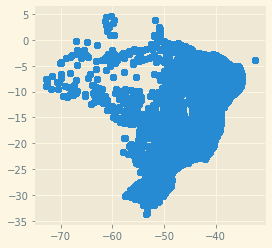

In [75]:
# VENDO OS GEODADOS EM UM GRAFICO:

geoAcess_Total.plot()

<AxesSubplot:>

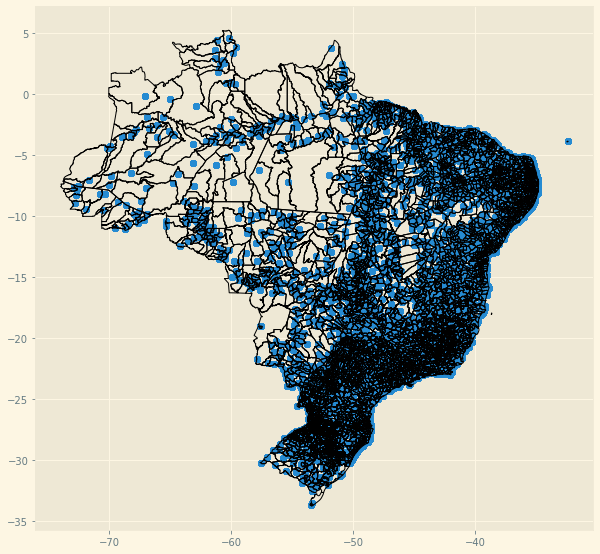

In [287]:
# PLOTANDO O ARQUIVOS GEOJSON TOTAL SOBRE O GRAFICO DOS ESTADOS DO BR

fig, ax = plt.subplots(figsize=(10,10))

geoAcess_Total.plot(ax=ax)

geoMunicipiosBR.plot(ax=ax, facecolor="None", edgecolor="black")

In [60]:
# VALORES MEDIOS DE ACESSOS POR EMPRESA

# agrupandos os valores por UF e calculando a media da coluna acessos e ordernando do maior p/valor de acessos
dfAcessos_empresa = (dfAcessosSlice_JanFev.groupby('Empresa')['Acessos'].mean()).sort_values(ascending = False)

dfAcessos_empresa # mostrando os valores

Empresa
TIM      254685.055556
VIVO     253738.529412
CLARO    249056.733333
OI       246558.615385
Name: Acessos, dtype: float64

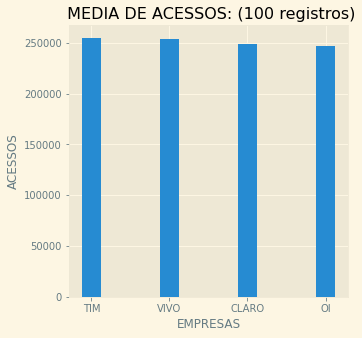

In [61]:
empresa = dfAcessos_empresa.index #no agrupamento as Empresa se tornaram os indices do novo dataframe
vlr_colunas = dfAcessos_empresa

#Estilo do tema
plt.style.use('Solarize_Light2')

#tamnaho da figura do grafico
fig, ax = plt.subplots(figsize=(5,5))

# Barras na vertical
plt.bar(empresa, vlr_colunas, align='center',  width = 0.25)

plt.ylabel("ACESSOS")
plt.xlabel("EMPRESAS")
plt.title(" MEDIA DE ACESSOS: (100 registros)")
plt.show()

In [62]:
dfAcessosSlice_JanFev[['Mês', 'Modalidade de Cobrança', 'Acessos']]

Mês Modalidade de Cobrança  Acessos
3745018    1               Pós-pago   291501
2046317    1               Pós-pago   288451
4053994    1               Pós-pago   280439
3659323    1               Pós-pago   279217
4057502    1               Pré-pago   278084
...      ...                    ...      ...
1581075    2               Pré-pago   226401
796538     2               Pré-pago   223844
1889357    2               Pós-pago   223100
280491     2               Pós-pago   221750
654514     2               Pós-pago   220614

[78 rows x 3 columns]

In [63]:
# VALORES MEDIOS DE MODALIDADE DE COBRANÇA

# agrupandos os valores por Modalidade de cobrança e calculando a media da coluna acessos,
# e ordernando os dados pelo mês; o parametro as_index garante que o as colunas agrupada não
# se tornem os indices do medida criada
dfAcessos_Tcobranca = (dfAcessosSlice_JanFev.groupby(['Mês','Modalidade de Cobrança'],
                                                         as_index=False)['Acessos'].mean()
                      ).sort_values(by='Mês', ascending = True)

dfAcessos_Tcobranca# mostrando os valores

Mês Modalidade de Cobrança        Acessos
0    1               Pré-pago  238572.785714
1    1               Pós-pago  250796.814815
2    2               Pré-pago  259367.307692
3    2               Pós-pago  253814.250000

In [64]:
somente_PrePago = dfAcessos_Tcobranca['Modalidade de Cobrança'] == 'Pré-pago'

dfAcessPrePago = dfAcessos_Tcobranca[somente_PrePago]

dfAcessPrePago

Mês Modalidade de Cobrança        Acessos
0    1               Pré-pago  238572.785714
2    2               Pré-pago  259367.307692

In [65]:
somente_PosPago = dfAcessos_Tcobranca['Modalidade de Cobrança'] == 'Pós-pago'

dfAcessPosPago = dfAcessos_Tcobranca[somente_PosPago]

dfAcessPosPago

Mês Modalidade de Cobrança        Acessos
1    1               Pós-pago  250796.814815
3    2               Pós-pago  253814.250000

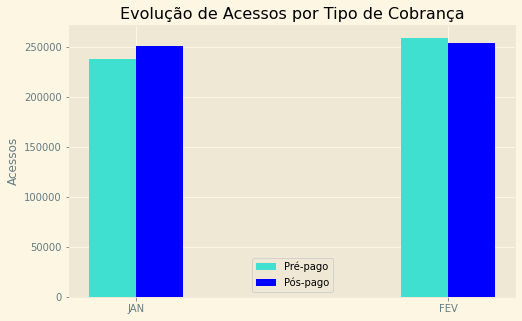

In [78]:
fig, ax = plt.subplots(figsize=(8,5))

meses = dfAcessPosPago.Mês
prePago = dfAcessPrePago.Acessos

posPago = dfAcessPosPago.Acessos

largura = 0.15

ax.bar(meses - largura/2, prePago, color='turquoise', width = largura, label = 'Pré-pago')
ax.set_xticks(meses)
ax.set_xticklabels(['JAN', 'FEV'])

ax.bar(meses + largura/2, posPago, color='blue', width = largura, label = 'Pós-pago')
ax.set_xticks(meses)
ax.set_xticklabels(['JAN', 'FEV'])

ax.set_title('Evolução de Acessos por Tipo de Cobrança')
ax.set_ylabel('Acessos')

ax.legend()

plt.show()

In [79]:
# VALORES MEDIOS DE MODALIDADE DE PESSOA

dfAcessos_Tpessoa = (dfAcessosSlice_JanFev.groupby(['Mês','Tipo de Pessoa'],
                                                         as_index=False)['Acessos'].mean()
                      ).sort_values(by='Mês', ascending = True)

dfAcessos_Tpessoa

Mês   Tipo de Pessoa        Acessos
0    1    Pessoa Física  241901.724138
1    1  Pessoa Jurídica  258031.916667
2    2    Pessoa Física  256323.458333
3    2  Pessoa Jurídica  254734.923077

In [80]:
somente_PJ= dfAcessos_Tpessoa['Tipo de Pessoa'] == 'Pessoa Jurídica'

dfAcessPJ = dfAcessos_Tpessoa[somente_PJ]

dfAcessPJ

Mês   Tipo de Pessoa        Acessos
1    1  Pessoa Jurídica  258031.916667
3    2  Pessoa Jurídica  254734.923077

In [81]:
somente_PF= dfAcessos_Tpessoa['Tipo de Pessoa'] == 'Pessoa Física'

dfAcessPF = dfAcessos_Tpessoa[somente_PF]

dfAcessPF

Mês Tipo de Pessoa        Acessos
0    1  Pessoa Física  241901.724138
2    2  Pessoa Física  256323.458333

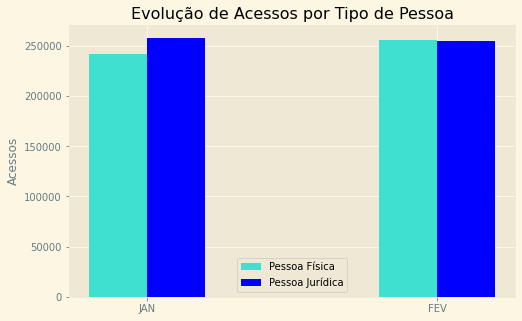

In [83]:
fig, ax = plt.subplots(figsize=(8,5))

meses = dfAcessPosPago.Mês
PF = dfAcessPF.Acessos
PJ = dfAcessPJ.Acessos

largura = 0.20

ax.bar(meses - largura/2, PF, color='turquoise', width = largura, label = 'Pessoa Física')
ax.set_xticks(meses)
ax.set_xticklabels(['JAN', 'FEV'])

ax.bar(meses + largura/2, PJ, color='blue', width = largura, label = 'Pessoa Jurídica')
ax.set_xticks(meses)
ax.set_xticklabels(['JAN', 'FEV'])

ax.set_title('Evolução de Acessos por Tipo de Pessoa')
ax.set_ylabel('Acessos')

ax.legend()

plt.show()

In [84]:
selecaoMa = geoAcess_Total['UF'] == 'MA' #criando a mascara que filtra somente o estado do maranhão

geoAcess_Ma= geoAcess_Total[selecaoMa]

geoAcess_Ma

Ano  Mês   Grupo Econômico Empresa            CNPJ  \
85       2022    2    TELECOM ITALIA     TIM   2421421000111   
242      2022    2        TELEFÔNICA    VIVO   2558157000162   
255      2022    2        TELEFÔNICA    VIVO   2558157000162   
434      2022    2        TELEFÔNICA    VIVO   2558157000162   
460      2022    2        TELEFÔNICA    VIVO   2558157000162   
...       ...  ...               ...     ...             ...   
4131191  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
4131254  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
4131473  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
4131565  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
4131568  2022    1  TELECOM AMERICAS   CLARO  40432544000147   

        Porte da Prestadora  UF        Município  Código IBGE Município  \
85             Grande Porte  MA  Vitorino Freire                2113009   
242            Grande Porte  MA         Carolina                2102804   
255            Grande Porte  MA          Pio XII                2108702   
434            Grande Porte  MA   Paço do Lumiar                2107506   
460            Grande Porte  MA       Chapadinha                2103208   
...                     ...  ..              ...                    ...   
4131191        Grande Porte  MA       Santa Rita                2110203   
4131254        Grande Porte  MA        Bacabeira                2101251   
4131473        Grande Porte  MA        Satubinha                2111722   
4131565        Grande Porte  MA  Itapecuru Mirim                2105401   
4131568        Grande Porte  MA   Barra do Corda                2101608   

         Código Nacional  Código Nacional (Chip) Modalidade de Cobrança  \
85                    98                      34               Pós-pago   
242                   99                      31               Pós-pago   
255                   98                      43               Pós-pago   
434                   98                      31               Pós-pago   
460                   98                      85               Pós-pago   
...                  ...                     ...                    ...   
4131191               98                      12               Pós-pago   
4131254               98                      98               Pré-pago   
4131473               98                      91               Pré-pago   
4131565               98                      69               Pré-pago   
4131568               99                      62               Pós-pago   

        Tecnologia Tecnologia Geração   Tipo de Pessoa Tipo de Produto  \
85             LTE                 4G  Pessoa Jurídica           DADOS   
242            GSM                 2G  Pessoa Jurídica             M2M   
255            GSM                 2G  Pessoa Jurídica             M2M   
434            GSM                 2G  Pessoa Jurídica             M2M   
460            GSM                 2G  Pessoa Jurídica             M2M   
...            ...                ...              ...             ...   
4131191        LTE                 4G    Pessoa Física       VOZ+DADOS   
4131254        GSM                 2G    Pessoa Física       VOZ+DADOS   
4131473        LTE                 4G    Pessoa Física       VOZ+DADOS   
4131565        LTE                 4G    Pessoa Física       VOZ+DADOS   
4131568        LTE                 4G    Pessoa Física       VOZ+DADOS   

         Acessos  latitude  longitude                    geometry  
85             1  -4.28184   -45.2505  POINT (-45.25050 -4.28184)  
242            1  -7.33584   -47.4634  POINT (-47.46340 -7.33584)  
255            1  -3.89315   -45.1759  POINT (-45.17590 -3.89315)  
434          106  -2.51657   -44.1019  POINT (-44.10190 -2.51657)  
460            2  -3.73875   -43.3538  POINT (-43.35380 -3.73875)  
...          ...       ...        ...                         ...  
4131191        1  -3.14241   -44.3211  POINT (-44.32110 -3.14241)  
413125

<AxesSubplot:>

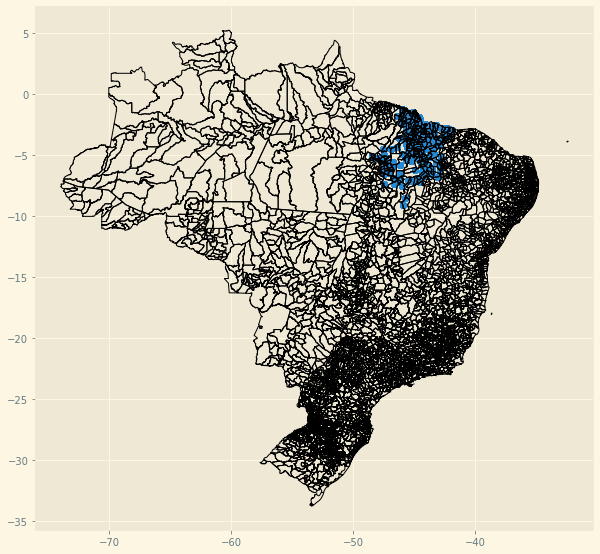

In [434]:
# PLOTANDO OS GEODADOS DO SOMENTE DO ESTADO DO MARANHÃO SOBRE O MAPA DO BRASIL

fig, ax = plt.subplots(figsize=(10,10))

geoAcess_Ma.plot(ax=ax)

geoMunicipiosBR.plot(ax=ax, facecolor="None", edgecolor="black")

In [85]:
# CARREGANDO O ARQUIVO GEOJSON COM QUE CONTEM AS GEOMETRIAS DO ESTADO MA

fileLocMun_Ma = ("C:/Users/Deusdedith Junior/Desktop/Bases/municipiosMaGeometria.json")

geoMunicipiosMa = gpd.read_file(fileLocMun_Ma,
                                driver = 'GeoJSON')

<AxesSubplot:>

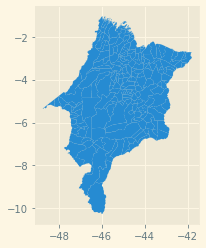

In [436]:
geoMunicipiosMa.plot()

<AxesSubplot:>

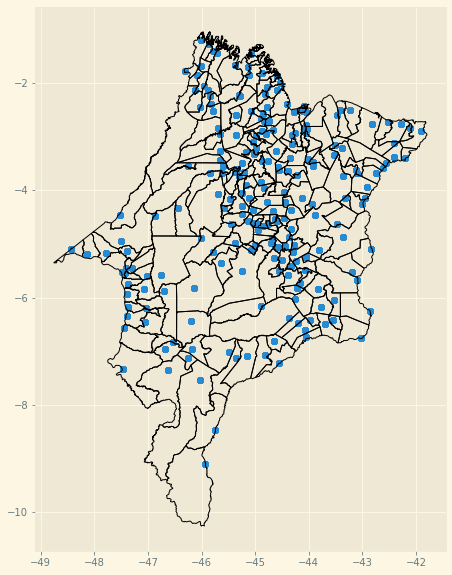

In [437]:
# PLOTANDO OS GEODADOS DO SOMENTE DO ESTADO DO MARANHÃO SOBRE O MAPA DO ESTADO MARANHÃO

fig, ax = plt.subplots(figsize=(10,10))

geoAcess_Ma.plot(ax=ax)

geoMunicipiosMa.plot(ax=ax, facecolor="None", edgecolor="black")

In [438]:
geoMunicipiosMa.head()

id                   name            description  \
0  2100055             Açailândia             Açailândia   
1  2100105           Afonso Cunha           Afonso Cunha   
2  2100154  Água Doce do Maranhão  Água Doce do Maranhão   
3  2100204              Alcântara              Alcântara   
4  2100303          Aldeias Altas          Aldeias Altas   

                                            geometry  
0  POLYGON ((-47.01661 -4.41956, -46.99895 -4.426...  
1  POLYGON ((-43.25227 -4.09112, -43.24397 -4.116...  
2  POLYGON ((-42.08106 -2.80004, -42.07141 -2.812...  
3  POLYGON ((-44.44867 -2.13069, -44.45121 -2.133...  
4  POLYGON ((-43.10642 -4.48175, -43.11555 -4.500...

In [86]:

# DESCOBRINDO O INDICE QUE CORRESPONDE AO POLIGONO QUE FORMA A CAPITAL SLZ

selecaoSlz_geometry = geoMunicipiosMa['description'] == 'São Luís'

geometry_Slz = geoMunicipiosMa[selecaoSlz_geometry]

geometry_Slz

id      name description  \
185  2111300  São Luís    São Luís   

                                              geometry  
185  POLYGON ((-44.37374 -2.45381, -44.32559 -2.499...

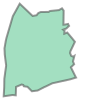

In [87]:
#PEGANDO SOMENTE O POLIGONO QUE FORMA A CAPITAL SLZ

SlzPoly = geoMunicipiosMa.iloc[185].geometry

SlzPoly

In [441]:
myMap = folium.Map()

myMap

In [88]:
mediaAcess_latitude = geoAcess_Ma['latitude'].mean()
mediaAcess_longitude = geoAcess_Ma['longitude'].mean()

In [443]:
myMap = folium.Map(location=[mediaAcess_latitude, mediaAcess_longitude])

marker = FastMarkerCluster(geoAcess_Ma[['latitude', 'longitude']])

myMap.add_child(marker)

myMap

In [446]:
myMap.save("datasets/MapasProjetoTelefoniaMovel/MapaCluster.html")

In [447]:
myMapHeat = folium.Map(location=[mediaAcess_latitude, mediaAcess_longitude], tiles='cartodbpositron')

folium.features.GeoJson(SlzPoly,
                                 style_function=lambda estilo:{
                                    'color': 'black',
                                    'weight': 2,
                                    'fillOpacity':0.0
                                }).add_to(myMapHeat)

HeatMap(geoAcess_Ma[['latitude', 'longitude']]).add_to(myMapHeat)


myMapHeat

In [448]:
myMapHeat.save("datasets/MapasProjetoTelefoniaMovel/MapaHeatMap.html")

In [91]:
geoAcesso_SliceMa = geoAcess_Ma.nlargest(100, 'Acessos')

geoAcesso_SliceMa.head(3)

Ano  Mês   Grupo Econômico Empresa            CNPJ  \
530385   2022    2  TELECOM AMERICAS   CLARO  40432544000147   
4082957  2022    1  TELECOM AMERICAS   CLARO  40432544000147   
1622684  2022    2                OI      OI   5423963000111   

        Porte da Prestadora  UF Município  Código IBGE Município  \
530385         Grande Porte  MA  São Luís                2111300   
4082957        Grande Porte  MA  São Luís                2111300   
1622684        Grande Porte  MA  São Luís                2111300   

         Código Nacional  Código Nacional (Chip) Modalidade de Cobrança  \
530385                98                      98               Pré-pago   
4082957               98                      98               Pré-pago   
1622684               98                      98               Pré-pago   

        Tecnologia Tecnologia Geração Tipo de Pessoa Tipo de Produto  Acessos  \
530385         LTE                 4G  Pessoa Física       VOZ+DADOS   306651   
4082957        LTE                 4G  Pessoa Física       VOZ+DADOS   305798   
1622684        LTE                 4G  Pessoa Física             VOZ   299163   

         latitude  longitude                    geometry  
530385   -2.53874   -44.2825  POINT (-44.28250 -2.53874)  
4082957  -2.53874   -44.2825  POINT (-44.28250 -2.53874)  
1622684  -2.53874   -44.2825  POINT (-44.28250 -2.53874)

In [111]:
dfAcessos_GroupMa = (geoAcess_Ma.groupby(['Município','latitude', 'longitude'],
                                                         as_index=False)['Acessos'].mean()
                      ).sort_values(by='Município', ascending = True)

dfAcessos_GroupMa

Município  latitude  longitude    Acessos
0               Afonso Cunha  -4.13631   -43.3275  26.887029
1                  Alcântara  -2.39574   -44.4062  23.866412
2              Aldeias Altas  -4.62621   -43.4689  36.777457
3       Altamira do Maranhão  -4.16598   -45.4706  16.111296
4    Alto Alegre do Maranhão  -4.21300   -44.4460  30.564674
..                       ...       ...        ...        ...
212  Vila Nova dos Martírios  -5.18889   -48.1336  31.652027
213          Vitorino Freire  -4.28184   -45.2505  39.762419
214        Vitória do Mearim  -3.45125   -44.8643  33.716418
215                  Zé Doca  -3.27014   -45.6553  58.213576
216    Água Doce do Maranhão  -2.84048   -42.1189  19.295349

[217 rows x 4 columns]

In [112]:
dfAcessos_GroupMa['geometry'] = None #iniciando a coluna vazia

#fazendo a iteração, onde para cada linha do dataframe(dfAcessos_Total) irei criar um objeto do tipo Point, salvar na coluna geometry e naquela linha

#index -> indice; row -> linha; iterrows -> cada linha
for index, row in dfAcessos_GroupMa.iterrows():
    dfAcessos_GroupMa.loc[index, 'geometry'] = Point(row.longitude, row.latitude)

In [113]:

# TRANSFORMANDO O DATASET dfAcess_Total EM UM GEODATAFREME

geoAcessGroupMa = gpd.GeoDataFrame(dfAcessos_GroupMa,
                                   geometry = 'geometry')

In [114]:
geoAcessGroupMa.sort_values(by='Acessos', ascending = False)

Município  latitude  longitude     Acessos  \
190                   São Luís  -2.53874   -44.2825  736.676760   
88                  Imperatriz  -5.51847   -47.4777  266.232122   
183        São José de Ribamar  -2.54704   -44.0597  169.606982   
135             Paço do Lumiar  -2.51657   -44.1019  129.219416   
11                  Apicum-Açu  -1.45862   -45.0864  121.191304   
..                         ...       ...        ...         ...   
3         Altamira do Maranhão  -4.16598   -45.4706   16.111296   
166        Santana do Maranhão  -3.10900   -42.4064   16.059625   
28              Benedito Leite  -7.21037   -44.5577   14.994475   
181  São Francisco do Maranhão  -6.25159   -42.8668   10.653747   
182        São Félix de Balsas  -7.07535   -44.8092    8.269777   

                       geometry  
190  POINT (-44.28250 -2.53874)  
88   POINT (-47.47770 -5.51847)  
183  POINT (-44.05970 -2.54704)  
135  POINT (-44.10190 -2.51657)  
11   POINT (-45.08640 -1.45862)  
..                          ...  
3    POINT (-45.47060 -4.16598)  
166  POINT (-42.40640 -3.10900)  
28   POINT (-44.55770 -7.21037)  
181  POINT (-42.86680 -6.25159)  
182  POINT (-44.80920 -7.07535)  

[217 rows x 5 columns]

In [115]:
mapa = folium.Map(location=[mediaAcess_latitude, mediaAcess_longitude], zoom_start=3)

tooltip = "Click em mim!"

for index, linha in geoAcessGroupMa.iterrows():
    
    limites = folium.features.GeoJson(linha.geometry, tooltip=tooltip)



    janelaInfo = folium.Popup("""
                            <b>Cidade:</b> {} <br><br> 
                            <b>Média de Acessos:</b> {}
                            """.format(linha.Município, linha.Acessos, max_width = 400))
    
    janelaInfo.add_to(limites)
    limites.add_to(mapa)
       
             
mapa

In [116]:
mapa.save('datasets/MapasProjetoTelefoniaMovel/mapaAcessosMaPontos.html')